<a href="https://colab.research.google.com/github/Abinaya-hub2006/Computer_Vision/blob/main/Region_Growing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

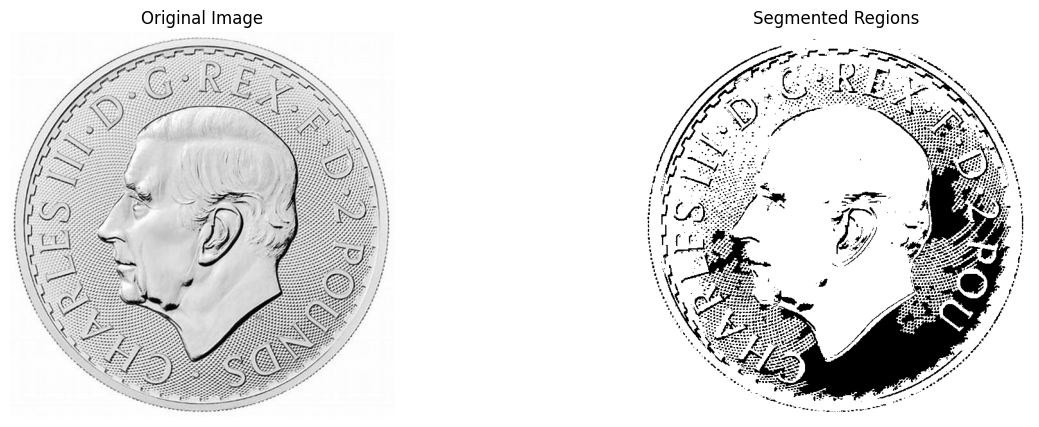

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
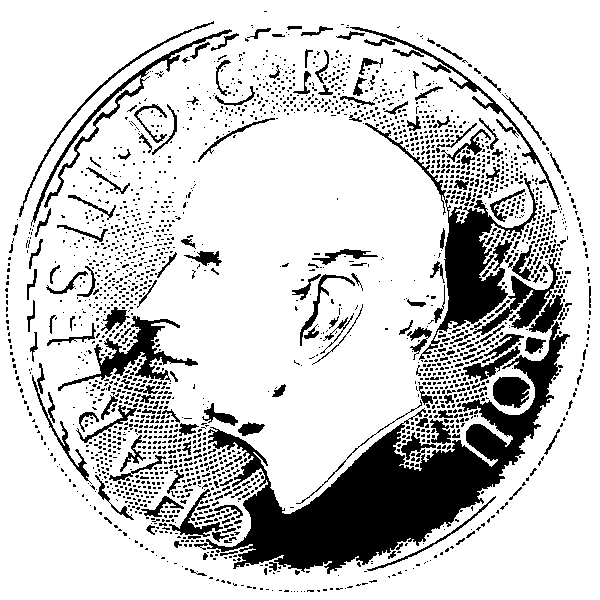

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed, threshold):
    segmented_image = np.zeros_like(image, dtype=np.uint8)
    segmented_image[seed[1], seed[0]] = 255

    pixel_list = [seed]
    while pixel_list:
        x, y = pixel_list.pop(0)

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < image.shape[1] and 0 <= ny < image.shape[0] and segmented_image[ny, nx] == 0:
                if abs(int(image[ny, nx]) - int(image[y, x])) < threshold:
                    segmented_image[ny, nx] = 255
                    pixel_list.append((nx, ny))

    return segmented_image

def detect_coins(image_path, seed, threshold):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found. Check the path.")

    segmented_image = region_growing(image, seed, threshold)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap="gray")
    plt.title("Segmented Regions")
    plt.axis("off")

    plt.show()

    return segmented_image

detect_coins(r"/content/cv.jpeg", seed=(50, 50), threshold=30)